# Assessing feature performance

DWPC = 0.4, computed on a subset of non-indications

In [3]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

In [4]:
auroc_df = pandas.read_table('data/all-features/auroc.tsv')
auroc_df.head(2)

,metapath,nonzero,seconds_per_query,auroc,auroc_permuted,delta_auroc,pval_auroc,length
0,CbGaD,0.312,0.0145,0.715,0.580,0.13500,0.000003,2
1,CbGdD,0.149,0.0136,0.512,0.515,-0.00332,0.921000,2


## Performance by path length

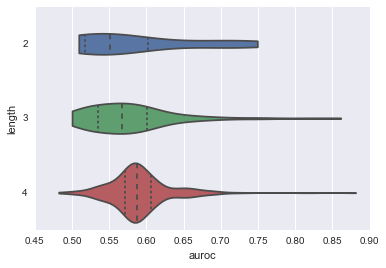

In [5]:
ax = seaborn.violinplot(x='auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

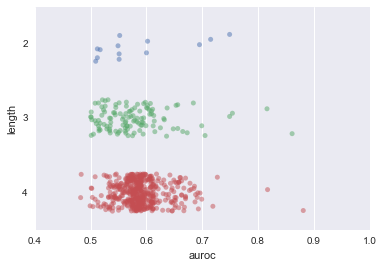

In [6]:
ax = seaborn.stripplot(x='auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha = 0.5)

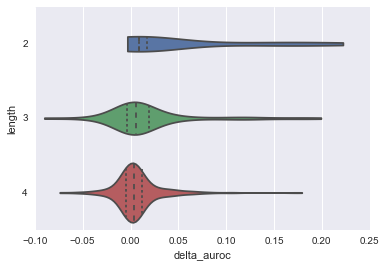

In [7]:
ax = seaborn.violinplot(x='delta_auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

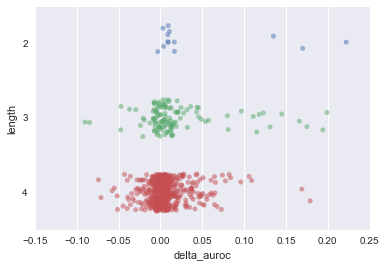

In [8]:
ax = seaborn.stripplot(x='delta_auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha=0.5)

## Feature AUROC versus non-zero fraction

In [9]:
grid = seaborn.jointplot('nonzero', 'auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Feature Permutation Hit versus AUROC

In [10]:
grid = seaborn.jointplot('auroc', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.apply(lambda x: '{}: {:.1%} nonzero'.format(x['metapath'], x['nonzero']), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Time per query

In [11]:
grid = seaborn.jointplot('seconds_per_query', 'auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

In [12]:
grid = seaborn.jointplot('seconds_per_query', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.metapath.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Performance by Metaedge

In [13]:
import hetio.readwrite

In [14]:
url = 'https://github.com/dhimmel/integrate/raw/d68b823bf2167e7ab7f0e784d1280200c33fb3bf/data/metagraph.json'
metagraph = hetio.readwrite.read_metagraph(url)

In [15]:
rows = list()
for abbreviation in auroc_df.metapath:
    metapath = metagraph.metapath_from_abbrev(abbreviation)
    for edge in metapath.edges:
        edge = edge.inverse if edge.inverted else edge
        rows.append((abbreviation, str(edge), edge.get_standard_abbrev()))
metaedge_df = pandas.DataFrame(rows, columns=['metapath', 'metaedge', 'metaedge_abbrev'])
metaedge_df = metaedge_df.merge(auroc_df)

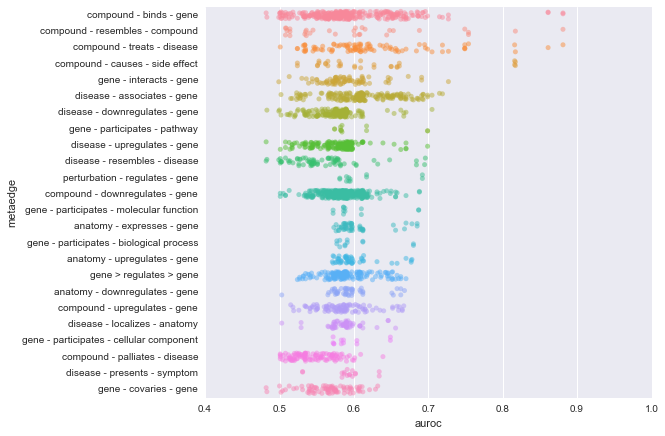

In [16]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)

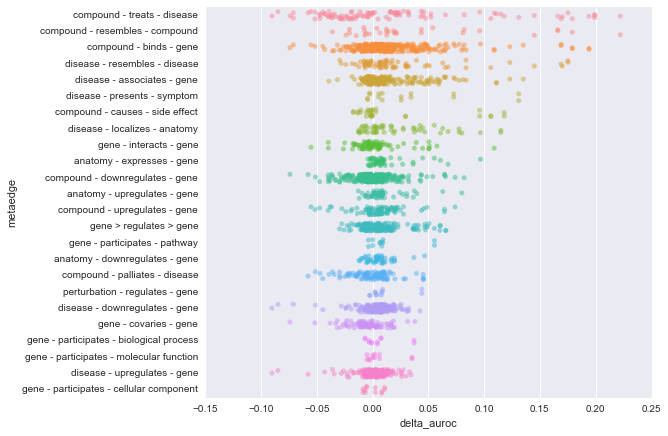

In [17]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('delta_auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='delta_auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)

In [18]:
auroc_df[auroc_df.metapath.str.contains('GeAeG')]

,metapath,nonzero,seconds_per_query,auroc,auroc_permuted,delta_auroc,pval_auroc,length
251,CbGeAeGaD,0.984,0.837,0.685,0.649,0.03640,0.000007,4
252,CbGeAeGdD,0.508,3.100,0.580,0.573,0.00711,0.008250,4
253,CbGeAeGuD,0.517,3.350,0.594,0.590,0.00388,0.071900,4
492,CdGeAeGaD,0.683,9.550,0.612,0.614,-0.00199,0.869000,4
493,CdGeAeGdD,0.358,35.600,0.588,0.581,0.00699,0.031400,4
494,CdGeAeGuD,0.365,36.900,0.596,0.598,-0.00145,0.691000,4
